In [95]:
import numpy as np
import pandas as pd
import seaborn as ssn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Objective is by giving input variables , what will be the surv_status , he/she can survive 5 years and longer(1)
or died with in 5 years(2) 

In [12]:
Hm_DataF = pd.read_csv('haberman.csv')

In [13]:
Hm_DataF.head()
Hm_DataF.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [14]:
Hm_DataF.columns = ['Age','Op_Year','axil_nodes','Surv_status']
Hm_DataF.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [16]:
Hm_DataF.columns
Hm_DataF.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [18]:
Hm_DataF['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

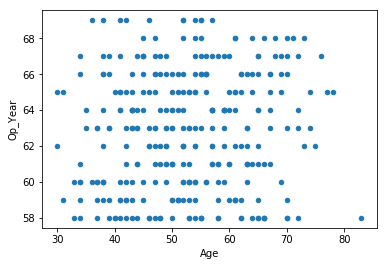

In [20]:
Hm_DataF.plot(kind='scatter', x = 'Age' , y = 'Op_Year')
plt.show()

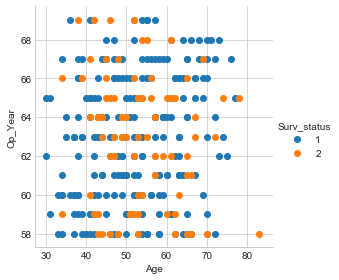

In [58]:
ssn.set_style(style='whitegrid')
ssn.FacetGrid(Hm_DataF,hue="Surv_status" ,size=4) \
    .map(plt.scatter, "Age", "Op_Year") \
    .add_legend()
plt.show()

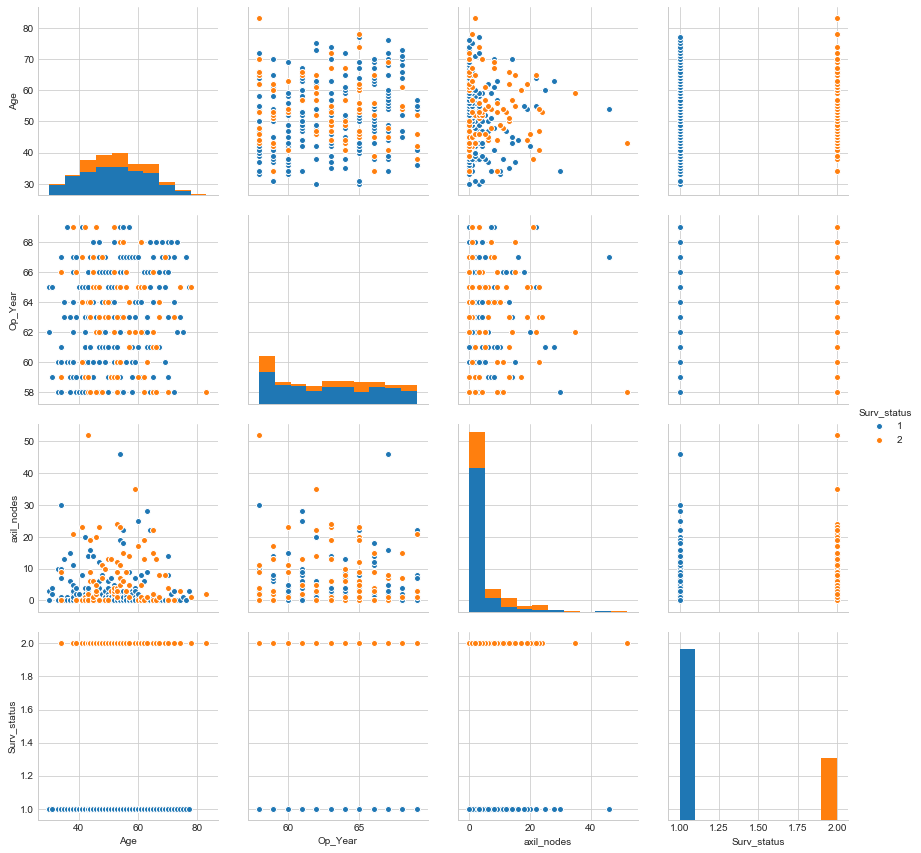

In [57]:
plt.close();
ssn.set_style("whitegrid");
ssn.pairplot(Hm_DataF, hue="Surv_status", size=3);
plt.show()

As per my observations

1)what i think is 'Age' with 'axil_nodes' can make some classification for Surv_status as per above pair plots
2)Age from 40 to 60 with axil_nodes with 0 to 20 have more surv_status with 2 i.e who are died with in 5 years

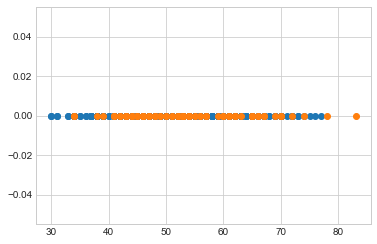

In [79]:
#One-D Scatter plot

Hm_DataF_1 = Hm_DataF.loc[Hm_DataF["Surv_status"] == 1];
Hm_DataF_2 = Hm_DataF.loc[Hm_DataF["Surv_status"] == 2];

plt.plot(Hm_DataF_1["Age"], np.zeros_like(Hm_DataF_1["Age"]), 'o')

plt.plot(Hm_DataF_2["Age"], np.zeros_like(Hm_DataF_2["Age"]), 'o')

plt.show()

There are overlapping with each other to see the data 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


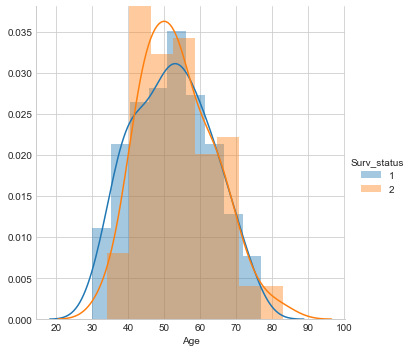

In [78]:
#using Histogram's to better understand the data, 
#for Age

ssn.FacetGrid(Hm_DataF, hue="Surv_status", size=5) \
   .map(ssn.distplot, "Age") \
   .add_legend();
plt.show();

In [ ]:
Here as we see that Surv_status 1 and 2 are overlapping with each other
1)the height represents the maximum number, as per histogram 40 - 46 age are under surv_status with 2
and for surv_status 1 maximum ages are from 51-55. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


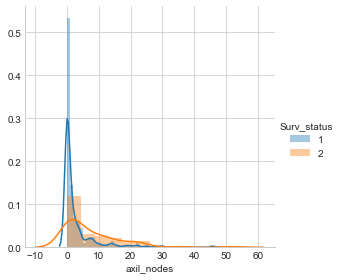

In [83]:
#For axil_nodes
ssn.FacetGrid(Hm_DataF,hue="Surv_status",size=4) \
    .map(ssn.distplot , "axil_nodes") \
    .add_legend();
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


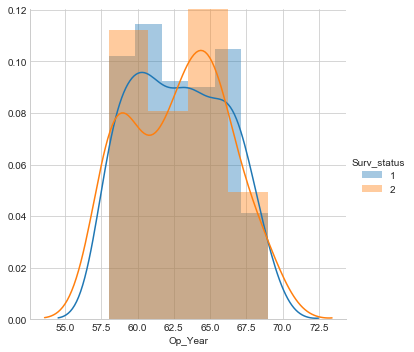

In [69]:
#for Op_Year
ssn.FacetGrid(Hm_DataF, hue="Surv_status", size=5) \
   .map(ssn.distplot, "Op_Year") \
   .add_legend();
plt.show();

By using univariant analysis , i decided to take variables of axil_nodes and Age and here axil_nodes will some what better then Age.

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


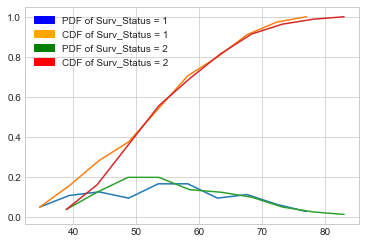

In [102]:
#Cumulative Distribution Function (CDF)
# for Age
counts , bin_edges = np.histogram(Hm_DataF_1["Age"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

blue_patch = mpatches.Patch(color='blue', label='PDF of Surv_Status = 1')
org_patch = mpatches.Patch(color='orange', label='CDF of Surv_Status = 1')
green_patch = mpatches.Patch(color='green', label='PDF of Surv_Status = 2')
red_patch = mpatches.Patch(color='red', label='CDF of Surv_Status = 2')
plt.legend(handles=[blue_patch,org_patch,green_patch,red_patch])
#blue_patch = mpatches.Patch(color='blue', label='PDF class 1')
#plt.legend(handles=[blue_patch])

counts , bin_edges = np.histogram(Hm_DataF_2["Age"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

Here the observations are :
    -> there is intersecting of both pdfs at age of 44 , in which the survival is 30% chance and 18% with no chance of survival.
    -> next interscting point is at 56 in which , 62% of probability chance for both.

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


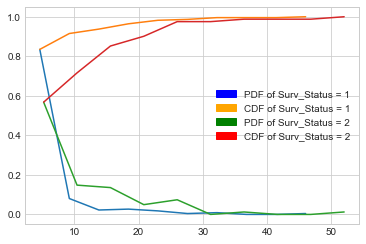

In [107]:
#for Op_Year

counts , bin_edges = np.histogram(Hm_DataF_1["axil_nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

blue_patch = mpatches.Patch(color='blue', label='PDF of Surv_Status = 1')
org_patch = mpatches.Patch(color='orange', label='CDF of Surv_Status = 1')
green_patch = mpatches.Patch(color='green', label='PDF of Surv_Status = 2')
red_patch = mpatches.Patch(color='red', label='CDF of Surv_Status = 2')
plt.legend(handles=[blue_patch,org_patch,green_patch,red_patch])
#blue_patch = mpatches.Patch(color='blue', label='PDF class 1')
#plt.legend(handles=[blue_patch])

counts , bin_edges = np.histogram(Hm_DataF_2["axil_nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

Observations :
    as per the first intersecting point the axil_nodes with 7 and less has 90% chance of survival 

In [113]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(Hm_DataF_1["Age"]))
print(np.mean(Hm_DataF_2["Age"]))
print(np.mean(np.append(Hm_DataF_2["Age"],500)));


print("\nStd-dev:");
print(np.std(Hm_DataF_1["Age"]))
print(np.std(Hm_DataF_2["Age"]))

Means:
52.11607142857143
53.67901234567901
59.1219512195122

Std-dev:
10.913004640364269
10.10418219303131


Observation :
    the average age of persons who are survived 5 years or more than is 52
    the average age of persons who are not survived 5 years is 53
    mean will affect when there is outliers.

In [111]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Hm_DataF_1["Age"]))
print(np.median(Hm_DataF_2["Age"]))
#Median with an outlier
print(np.median(np.append(Hm_DataF_2["Age"],500)));


print("\nQuantiles:")
print(np.percentile(Hm_DataF_1["Age"] , np.arange(0,100,25)))
print(np.percentile(Hm_DataF_2["Age"] , np.arange(0,100,25)))


print("\n90th Percentiles:")
print(np.percentile(Hm_DataF_1["Age"],90))
print(np.percentile(Hm_DataF_2["Age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Hm_DataF_1["Age"]))
print(robust.mad(Hm_DataF_2["Age"]))




Medians:
52.0
53.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816
10.913004640364269
10.10418219303131


In [ ]:
there is not much impact on adding the outliners of age 

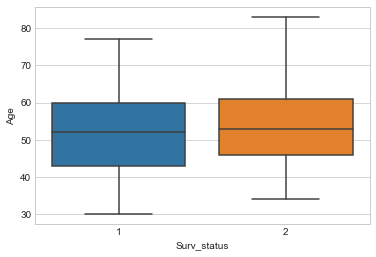

In [116]:
ssn.boxplot(x='Surv_status',y='Age', data=Hm_DataF)
plt.show()

In [ ]:
medians for surv_status 1 is 52 and surv_status 2 is 53
most of the persons with age 43 to 60  are survived above 5 years

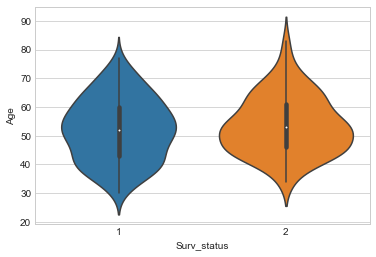

In [119]:
ssn.violinplot(x="Surv_status", y="Age", data=Hm_DataF, size=5)
plt.show()

In [ ]:
Summary :
    from the starting pair plots i have observed that Age and axil_nodes are used in determining the output
    people with 40 to 66 years are are survived for more than 5 years

SyntaxError: invalid syntax (<ipython-input-124-4451821cc3ca>, line 1)